In [91]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

if os.path.exists("MSFT.csv"):
    data = pd.read_csv("MSFT.csv", index_col=0)
else: #download data if not found
    data = yf.Ticker("MSFT")
    data = data.history(period="max")
    data.to_csv("MSFT.csv")



# Convert the index to datetime with utc=True
data.index = pd.to_datetime(data.index, utc=True)

# Ensure the index is a DatetimeIndex
if not isinstance(data.index, pd.DatetimeIndex):
    data = data.set_index(pd.to_datetime(data.index, utc=True))

# Filter data to include only records from 2016 onwards
data = data[data.index.year >= 2010]

# reset the index (the index will be 0,1,2... rather than the date)
# data = data.reset_index()

#volume values are too lage
data['Volume'] = data['Volume']/10000000

data.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04 05:00:00+00:00,23.224624,23.588694,23.201869,23.474922,3.84091,0.0,0.0
2010-01-05 05:00:00+00:00,23.399074,23.588694,23.239793,23.482506,4.97496,0.0,0.0
2010-01-06 05:00:00+00:00,23.421828,23.573524,23.148776,23.338396,5.81824,0.0,0.0
2010-01-07 05:00:00+00:00,23.232211,23.285306,22.898481,23.095686,5.05597,0.0,0.0
2010-01-08 05:00:00+00:00,22.966743,23.421830,22.936404,23.254965,5.11974,0.0,0.0
2010-01-11 05:00:00+00:00,23.292886,23.330811,22.845384,22.959156,6.87547,0.0,0.0
2010-01-12 05:00:00+00:00,22.868133,23.057753,22.686099,22.807455,6.59121,0.0,0.0
2010-01-13 05:00:00+00:00,22.951567,23.148772,22.761948,23.019831,5.18635,0.0,0.0
2010-01-14 05:00:00+00:00,22.989495,23.588694,22.951571,23.482506,6.32281,0.0,0.0


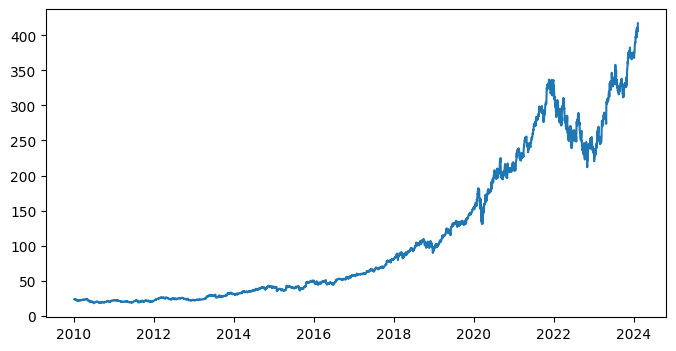

In [ ]:
# # Plotting
plt.figure(figsize=(8,4))
plt.plot(data['Close'], label='Closing Price')

In [92]:
# Feature: Moving Averages

data['sma_20'] = data['Close'].rolling(window=20).mean() # 20-day Simple Moving Average
data['ema_12'] = data['Close'].ewm(span=12, adjust=False).mean() # 12-day Exponential Moving Average

# Feature: Rate of Change
data['roc'] = data['Close'].pct_change() * 100 # Percentage change in closing price

# Feature: Bollinger Bands
data['upper_band'], data['lower_band'] = data['Close'].rolling(window=20).mean() + 2 * data['Close'].rolling(window=20).std(), data['Close'].rolling(window=20).mean() - 2 * data['Close'].rolling(window=20).std()

# Feature: Historical Volatility
data['historical_volatility'] = data['Close'].pct_change().rolling(window=20).std() * (252 ** 0.5) # Annualized volatility

# Feature: Price Rate of Change
data['price_roc'] = data['Close'].pct_change()

# Feature Interaction: Volume-Price Interaction
data['volume_price_interaction'] = data['Volume'] * data['Close']

# Feature: Seasonality
data['month'] = data.index.month
data['quarter'] = data.index.quarter

# External Factor: Market Index Movement (Assuming 'market_index' is a separate dataset)
# data['market_index_movement'] = market_index['Close'].pct_change()

# Display the updated DataFrame
data = data.dropna()
data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits,sma_20,ema_12,roc,upper_band,lower_band,historical_volatility,price_roc,volume_price_interaction,month,quarter
Date,,,,,,,,,,,,,,,,,
2010-02-02 05:00:00+00:00,21.518038,21.616640,21.343587,21.586300,5.44137,0.0,0.0,22.705444,22.216244,0.175923,24.110909,21.299979,0.236032,0.001759,117.459045,2,1
2010-02-03 05:00:00+00:00,21.434614,21.836608,21.328427,21.715250,6.13979,0.0,0.0,22.617081,22.139168,0.597370,24.038965,21.195198,0.238272,0.005974,133.327075,2,1
2010-02-04 05:00:00+00:00,21.525636,21.616654,21.093303,21.116058,7.78500,0.0,0.0,22.505964,21.981766,-2.759313,24.033891,20.978038,0.252797,-0.027593,164.388514,2,1
2010-02-05 05:00:00+00:00,21.237403,21.449778,20.911257,21.252573,8.09601,0.0,0.0,22.413809,21.869583,0.646497,24.012659,20.814959,0.254982,0.006465,172.061044,2,1
2010-02-08 05:00:00+00:00,21.244999,21.298093,20.911268,21.025040,5.28206,0.0,0.0,22.302312,21.739653,-1.070615,23.963956,20.640669,0.252626,-0.010706,111.055521,2,1


In [93]:
data['Open - Close'] = data['Open'] - data['Close']
data['High - Low'] = data['High'] - data['Low']
data = data.dropna()
data['Close Tomorrow'] = (data['Close'].shift(-1) > data['Close']).astype(int)* 2 - 1  # * 2 - 1 ==>   replaces 0 with -1

data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,sma_20,ema_12,roc,upper_band,lower_band,historical_volatility,price_roc,volume_price_interaction,month,quarter,Open - Close,High - Low,Close Tomorrow
Date,,,,,,,,,,,,,,,,,,,,
2010-02-02 05:00:00+00:00,21.518038,21.616640,21.343587,21.586300,5.44137,0.0,0.0,22.705444,22.216244,0.175923,24.110909,21.299979,0.236032,0.001759,117.459045,2,1,-0.068262,0.273053,1
2010-02-03 05:00:00+00:00,21.434614,21.836608,21.328427,21.715250,6.13979,0.0,0.0,22.617081,22.139168,0.597370,24.038965,21.195198,0.238272,0.005974,133.327075,2,1,-0.280636,0.508181,-1
2010-02-04 05:00:00+00:00,21.525636,21.616654,21.093303,21.116058,7.78500,0.0,0.0,22.505964,21.981766,-2.759313,24.033891,20.978038,0.252797,-0.027593,164.388514,2,1,0.409578,0.523351,1
2010-02-05 05:00:00+00:00,21.237403,21.449778,20.911257,21.252573,8.09601,0.0,0.0,22.413809,21.869583,0.646497,24.012659,20.814959,0.254982,0.006465,172.061044,2,1,-0.015170,0.538521,-1
2010-02-08 05:00:00+00:00,21.244999,21.298093,20.911268,21.025040,5.28206,0.0,0.0,22.302312,21.739653,-1.070615,23.963956,20.640669,0.252626,-0.010706,111.055521,2,1,0.219960,0.386825,1


In [94]:
horizons = [2,5,60,250] #2days , week, ...

for horizon in horizons:
    rolling_averages = data.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    data[ratio_column] = data["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    data[trend_column] = data.shift(1).rolling(horizon).sum()["Close Tomorrow"]


# data = data.dropna(subset=data.columns[data.columns != "Tomorrow"])
data = data.dropna()


data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,sma_20,ema_12,roc,...,High - Low,Close Tomorrow,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-28 05:00:00+00:00,22.376571,22.399800,21.253872,21.486155,14.12494,0.0,0.0,21.931363,21.951690,-3.879462,...,1.145928,-1,0.980219,0.0,0.975533,3.0,1.015839,-2.0,1.040871,8.0
2011-01-31 05:00:00+00:00,21.501644,21.602300,21.230647,21.470673,6.50290,0.0,0.0,21.924395,21.877688,-0.072055,...,0.371652,1,0.999640,-2.0,0.979305,1.0,1.014572,-2.0,1.040171,6.0
2011-02-01 05:00:00+00:00,21.524869,21.726181,21.377758,21.671982,6.28107,0.0,0.0,21.924782,21.846040,0.937601,...,0.348423,-1,1.004666,0.0,0.991709,1.0,1.023450,-2.0,1.049810,8.0
2011-02-02 05:00:00+00:00,21.625527,21.764897,21.586813,21.633270,4.58240,0.0,0.0,21.918975,21.813307,-0.178625,...,0.178085,-1,0.999106,0.0,0.995865,-1.0,1.020842,-2.0,1.047858,6.0
2011-02-03 05:00:00+00:00,21.656492,21.656492,21.323555,21.408724,6.03401,0.0,0.0,21.905425,21.751063,-1.037968,...,0.332937,1,0.994783,-2.0,0.994175,-3.0,1.009629,-2.0,1.036904,6.0


In [130]:
X = data[['Volume', 'Open - Close', 'High - Low', 'Close_Ratio_2', 'Close_Ratio_5', 'Close_Ratio_60', "Close_Ratio_250", 'Trend_2', 'Trend_5', 'Trend_60', "sma_20", "ema_12", "roc", "upper_band", "lower_band", "historical_volatility", "price_roc", "volume_price_interaction"]]
X2 = data[['Volume','Close' , 'Open - Close', 'High - Low', 'Close_Ratio_2', 'Close_Ratio_5', 'Close_Ratio_60', "Close_Ratio_250", 'Trend_2', 'Trend_5', 'Trend_60', "sma_20", "ema_12", "roc", "upper_band", "lower_band", "historical_volatility", "price_roc", "volume_price_interaction"]]

#Mohammed says that Ratio_60 is very important
y = data['Close Tomorrow']

X_train = X.iloc[0:-250]
y_train = y.iloc[0:-250]

X_test = X.iloc[-250:]
y_test = y.iloc[-250:]

X2_test = X2.iloc[-250:]

X_train.tail()

,Volume,Open - Close,High - Low,Close_Ratio_2,Close_Ratio_5,Close_Ratio_60,Close_Ratio_250,Trend_2,Trend_5,Trend_60,sma_20,ema_12,roc,upper_band,lower_band,historical_volatility,price_roc,volume_price_interaction
Date,,,,,,,,,,,,,,,,,,
2023-02-06 05:00:00+00:00,2.25180,0.664125,3.489052,0.996933,1.002788,1.057004,0.983076,-2.0,1.0,2.0,240.971825,247.834531,-0.611586,260.247531,221.696119,0.313320,-0.006116,573.112890
2023-02-07 05:00:00+00:00,5.08414,-6.968213,8.613627,1.020579,1.029053,1.098131,1.024924,0.0,1.0,4.0,242.976054,250.507439,4.202220,263.602008,222.350100,0.337338,0.042022,1348.356813
2023-02-08 05:00:00+00:00,5.46860,6.413137,10.457295,0.998447,1.014947,1.092898,1.022396,0.0,-1.0,2.0,244.853410,252.642563,-0.310206,266.119947,223.586872,0.339821,-0.003102,1445.819870
2023-02-09 05:00:00+00:00,4.23751,10.090522,11.081763,0.994136,1.003861,1.078887,1.011032,-2.0,-3.0,0.0,246.233672,253.974949,-1.165975,268.028424,224.438921,0.335818,-0.011660,1107.274372
2023-02-10 05:00:00+00:00,2.58185,-1.556209,3.399847,0.999013,0.998270,1.075129,1.009490,-2.0,-3.0,0.0,247.452367,255.023053,-0.197258,269.657086,225.247647,0.336163,-0.001973,673.314538


In [131]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV #for selecting best parameter (K) for the model
from sklearn.metrics import accuracy_score, confusion_matrix

#using GridSearch to find the best parameter
params = {'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5)
#cv=5 means that the model evaluation is done using 5-fold cross-validation during the grid search for finding the best parameter (n_neighbors) for the KNeighborsClassifier.

#fit the model
model.fit(X_train, y_train)

#Accuracy Score
accuracy_train = accuracy_score(y_train, model.predict(X_train))
accuracy_test = accuracy_score(y_test, model.predict(X_test))

print(f'Train_data Accuracy: {accuracy_train:.2f}%')
print(f'Test_data Accuracy: {accuracy_test:.2f}%')

# Confusion Matrix
conf_matrix_train = confusion_matrix(y_train, model.predict(X_train))
conf_matrix_test = confusion_matrix(y_test, model.predict(X_test))

print("\nConfusion Matrix for Training Data:")
print(conf_matrix_train)

print("\nConfusion Matrix for Test Data:")
print(conf_matrix_test)

# Number of correct predictions for each class
correct_predictions_1_train = conf_matrix_train[1, 1]
correct_predictions_minus1_train = conf_matrix_train[0, 0]

correct_predictions_1_test = conf_matrix_test[1, 1]
correct_predictions_minus1_test = conf_matrix_test[0, 0]

print(f'\nCorrect predictions for class "1" in Training Data: {correct_predictions_1_train}')
print(f'Correct predictions for class "-1" in Training Data: {correct_predictions_minus1_train}')

print(f'\nCorrect predictions for class "1" in Test Data: {correct_predictions_1_test}')
print(f'Correct predictions for class "-1" in Test Data: {correct_predictions_minus1_test}')

Train_data Accuracy: 0.66%
Test_data Accuracy: 0.57%

Confusion Matrix for Training Data:
[[ 900  551]
 [ 485 1094]]

Confusion Matrix for Test Data:
[[57 54]
 [53 86]]

Correct predictions for class "1" in Training Data: 1094
Correct predictions for class "-1" in Training Data: 900

Correct predictions for class "1" in Test Data: 86
Correct predictions for class "-1" in Test Data: 57


In [134]:
from sklearn.svm import SVC
model2 = SVC()
model2 = model.fit(X_train, y_train)

#Accuracy Score
accuracy_train = accuracy_score(y_train, model2.predict(X_train))
accuracy_test = accuracy_score(y_test, model2.predict(X_test))

print(f'Train_data Accuracy: {accuracy_train:.2f}%')
print(f'Test_data Accuracy: {accuracy_test:.2f}%')

# Confusion Matrix
conf_matrix_train = confusion_matrix(y_train, model2.predict(X_train))
conf_matrix_test = confusion_matrix(y_test, model2.predict(X_test))

print("\nConfusion Matrix for Training Data:")
print(conf_matrix_train)

print("\nConfusion Matrix for Test Data:")
print(conf_matrix_test)

# Number of correct predictions for each class
correct_predictions_1_train = conf_matrix_train[1, 1]
correct_predictions_minus1_train = conf_matrix_train[0, 0]

correct_predictions_1_test = conf_matrix_test[1, 1]
correct_predictions_minus1_test = conf_matrix_test[0, 0]

print(f'\nCorrect predictions for class "1" in Training Data: {correct_predictions_1_train}')
print(f'Correct predictions for class "-1" in Training Data: {correct_predictions_minus1_train}')

print(f'\nCorrect predictions for class "1" in Test Data: {correct_predictions_1_test}')
print(f'Correct predictions for class "-1" in Test Data: {correct_predictions_minus1_test}')

Train_data Accuracy: 0.66%
Test_data Accuracy: 0.57%

Confusion Matrix for Training Data:
[[ 900  551]
 [ 485 1094]]

Confusion Matrix for Test Data:
[[57 54]
 [53 86]]

Correct predictions for class "1" in Training Data: 1094
Correct predictions for class "-1" in Training Data: 900

Correct predictions for class "1" in Test Data: 86
Correct predictions for class "-1" in Test Data: 57


In [138]:
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(n_estimators=200, min_samples_split=100, random_state=1)

#fit the model
model3.fit(X_train, y_train)

#Accuracy Score
accuracy_train = accuracy_score(y_train, model3.predict(X_train))
accuracy_test = accuracy_score(y_test, model3.predict(X_test))

print(f'Train_data Accuracy: {accuracy_train:.2f}%')
print(f'Test_data Accuracy: {accuracy_test:.2f}%')

# Confusion Matrix
conf_matrix_train = confusion_matrix(y_train, model3.predict(X_train))
conf_matrix_test = confusion_matrix(y_test, model3.predict(X_test))

print("\nConfusion Matrix for Training Data:")
print(conf_matrix_train)

print("\nConfusion Matrix for Test Data:")
print(conf_matrix_test)

# Number of correct predictions for each class
correct_predictions_1_train = conf_matrix_train[1, 1]
correct_predictions_minus1_train = conf_matrix_train[0, 0]

correct_predictions_1_test = conf_matrix_test[1, 1]
correct_predictions_minus1_test = conf_matrix_test[0, 0]

print(f'\nCorrect predictions for class "1" in Training Data: {correct_predictions_1_train}')
print(f'Correct predictions for class "-1" in Training Data: {correct_predictions_minus1_train}')

print(f'\nCorrect predictions for class "1" in Test Data: {correct_predictions_1_test}')
print(f'Correct predictions for class "-1" in Test Data: {correct_predictions_minus1_test}')

Train_data Accuracy: 0.80%
Test_data Accuracy: 0.54%

Confusion Matrix for Training Data:
[[1049  402]
 [ 203 1376]]

Confusion Matrix for Test Data:
[[90 21]
 [94 45]]

Correct predictions for class "1" in Training Data: 1376
Correct predictions for class "-1" in Training Data: 1049

Correct predictions for class "1" in Test Data: 45
Correct predictions for class "-1" in Test Data: 90


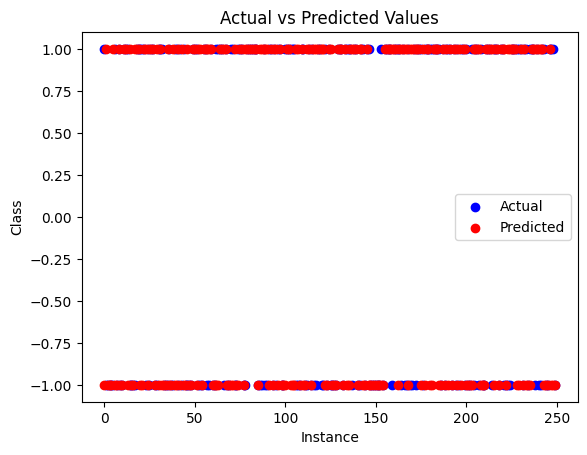

In [99]:
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_test)), model.predict(X_test), color='red', label='Predicted')

plt.title('Actual vs Predicted Values')
plt.xlabel('Instance')
plt.ylabel('Class')
plt.legend()
plt.show()

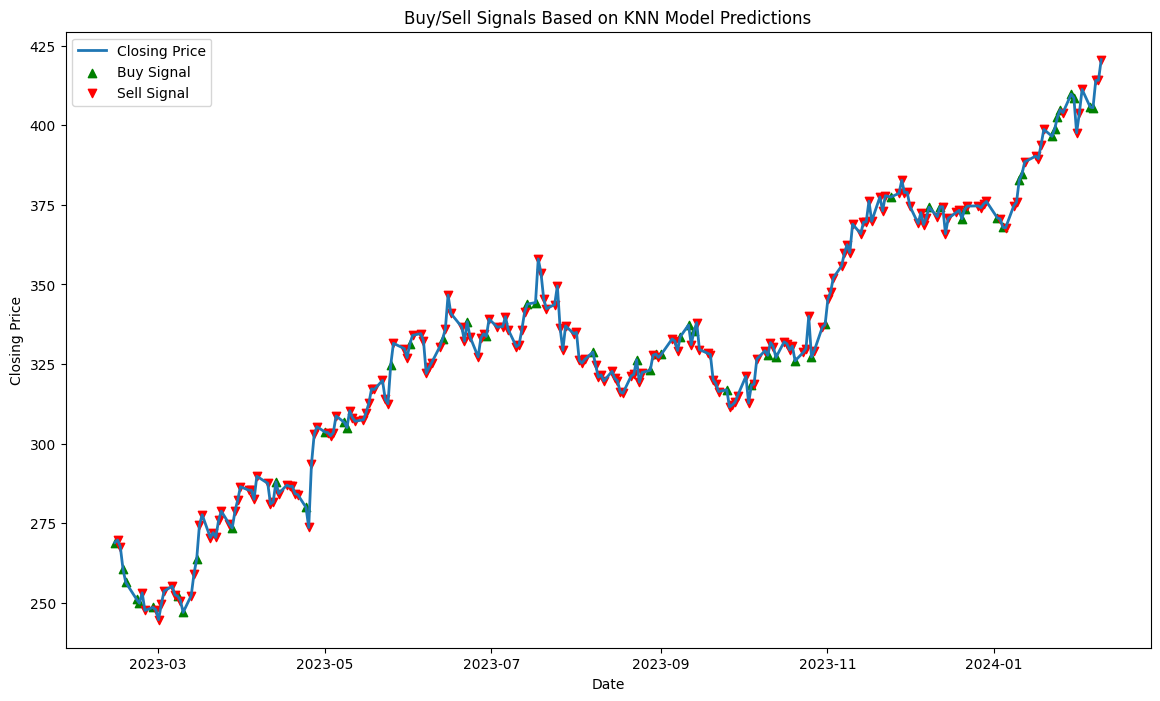

In [ ]:
# Predictions on the test set
y_pred = model.predict(X_test)

# Create a DataFrame for visualization
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}, index=y_test.index)

# Filter rows where the model predicts a buy signal
buy_signals = df_results[df_results['Predicted'] == 1]

# Filter rows where the model predicts a sell signal
sell_signals = df_results[df_results['Predicted'] == -1]

# Plotting the closing prices
plt.figure(figsize=(14, 8))
plt.plot(data.index[-250:], data['Close'][-250:], label='Closing Price', linewidth=2)

# Plotting buy signals
plt.scatter(buy_signals.index, data['Close'].loc[buy_signals.index], marker='^', color='g', label='Buy Signal')

# Plotting sell signals
plt.scatter(sell_signals.index, data['Close'].loc[sell_signals.index], marker='v', color='r', label='Sell Signal')

plt.title('Buy/Sell Signals Based on KNN Model Predictions')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


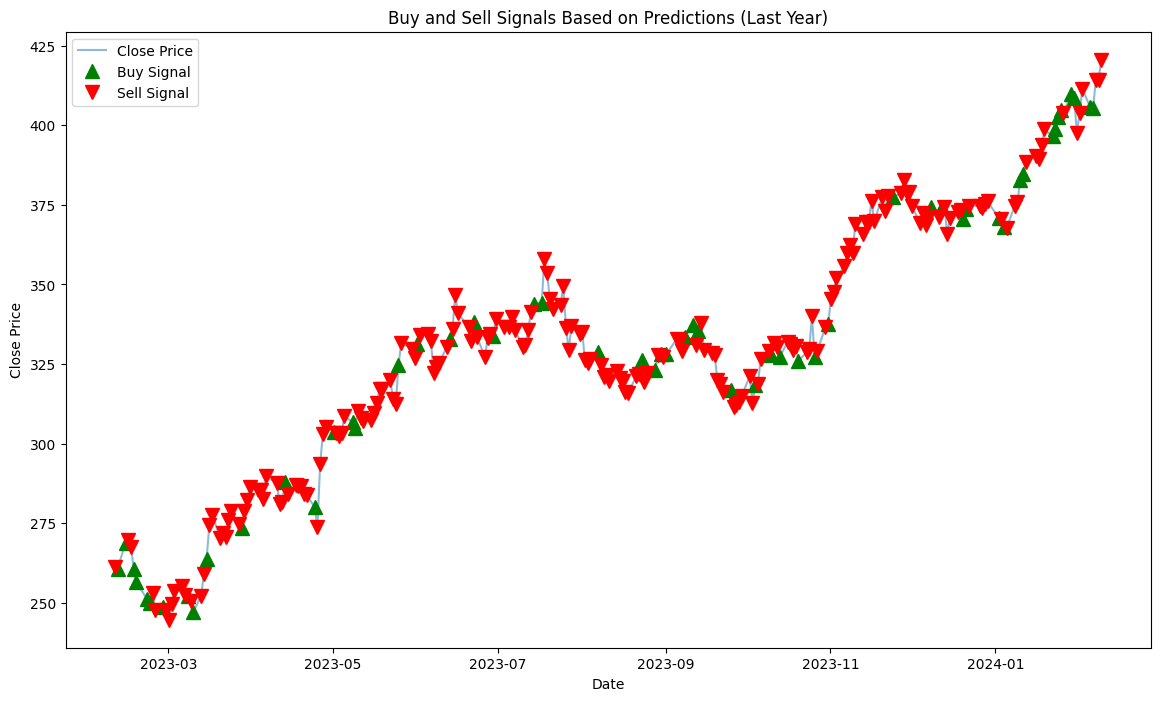

In [ ]:
# Assuming 'model' is your trained KNN model
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

# Concatenate the training and testing predictions for the entire dataset
all_predictions = np.concatenate([predictions_train, predictions_test])

# Create a new DataFrame with the predicted signals
signals_df = pd.DataFrame(index=data.index)
signals_df['Buy_Sell_Signal'] = all_predictions

# Filter signals for the last year
last_year_signals = signals_df[signals_df.index >= signals_df.index[-1] - pd.DateOffset(years=1)]

# Filter stock data for the last year
last_year_data = data[data.index >= data.index[-1] - pd.DateOffset(years=1)]

# Plot the Buy (1) and Sell (-1) signals for the last year
plt.figure(figsize=(14, 8))
plt.plot(last_year_data.index, last_year_data['Close'], label='Close Price', alpha=0.5)

# Plot Buy signals
plt.plot(last_year_signals[last_year_signals['Buy_Sell_Signal'] == 1].index,
         last_year_data['Close'][last_year_signals['Buy_Sell_Signal'] == 1],
         '^', markersize=10, color='g', label='Buy Signal')

# Plot Sell signals
plt.plot(last_year_signals[last_year_signals['Buy_Sell_Signal'] == -1].index,
         last_year_data['Close'][last_year_signals['Buy_Sell_Signal'] == -1],
         'v', markersize=10, color='r', label='Sell Signal')

plt.title('Buy and Sell Signals Based on Predictions (Last Year)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


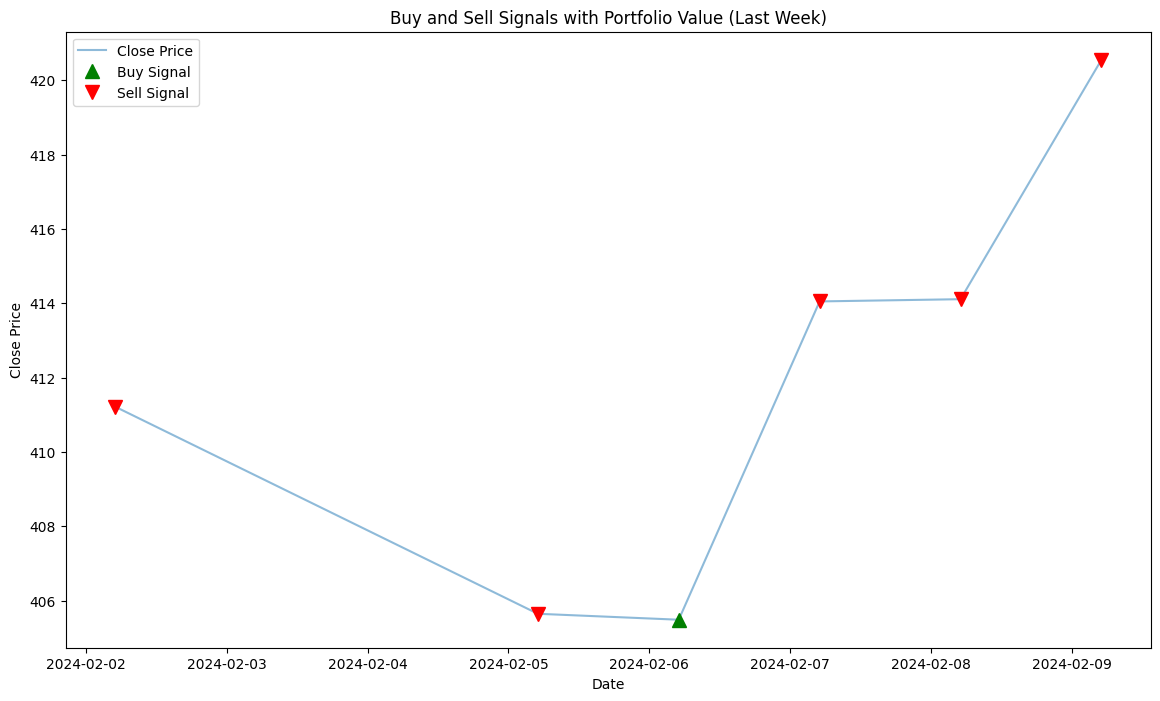

Initial Investment: $411.22
Total Profit after one week of trading: $8.56
Total Portfolio Value: $419.78


In [122]:
# Assuming 'model' is your trained KNN model
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

# Concatenate the training and testing predictions for the entire dataset
all_predictions = np.concatenate([predictions_train, predictions_test])

# Create a new DataFrame with the predicted signals
signals_df = pd.DataFrame(index=data.index)
signals_df['Buy_Sell_Signal'] = all_predictions

# Filter signals for the last week
last_week_signals = signals_df[signals_df.index >= signals_df.index[-1] - pd.DateOffset(weeks=1)]

# Filter stock data for the last week
last_week_data = data[data.index >= data.index[-1] - pd.DateOffset(weeks=1)]

# Calculate profit and portfolio value based on buy and sell signals
profit = 0
portfolio_value = 0
position = 0  # 0: no position, 1: long position, -1: short position
buy_price = 0

for index, row in last_week_signals.iterrows():
    if row['Buy_Sell_Signal'] == 1 and position == 0:  # Buy signal and no current position
        buy_price = last_week_data.loc[index, 'Close']
        position = 1  # Set to long position
    elif row['Buy_Sell_Signal'] == -1 and position == 1:  # Sell signal and long position
        profit += last_week_data.loc[index, 'Close'] - buy_price
        position = 0  # Set to no position

# Calculate the initial investment (assuming one stock bought on the first buy signal)
initial_investment = last_week_data.iloc[0]['Close']

# Calculate the total portfolio value
portfolio_value = initial_investment + profit

# Plot the Buy (1) and Sell (-1) signals for the last week
plt.figure(figsize=(14, 8))
plt.plot(last_week_data.index, last_week_data['Close'], label='Close Price', alpha=0.5)

# Plot Buy signals
plt.plot(last_week_signals[last_week_signals['Buy_Sell_Signal'] == 1].index,
         last_week_data['Close'][last_week_signals['Buy_Sell_Signal'] == 1],
         '^', markersize=10, color='g', label='Buy Signal')

# Plot Sell signals
plt.plot(last_week_signals[last_week_signals['Buy_Sell_Signal'] == -1].index,
         last_week_data['Close'][last_week_signals['Buy_Sell_Signal'] == -1],
         'v', markersize=10, color='r', label='Sell Signal')

plt.title('Buy and Sell Signals with Portfolio Value (Last Week)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Print the total profit and portfolio value
print(f'Initial Investment: ${initial_investment:.2f}')
print(f'Total Profit after one week of trading: ${profit:.2f}')
print(f'Total Portfolio Value: ${portfolio_value:.2f}')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not 

Initial Portfolio Value: 100000
Final Portfolio Value: 152177.57791137698
Gain or Loss: 52177.57791137698


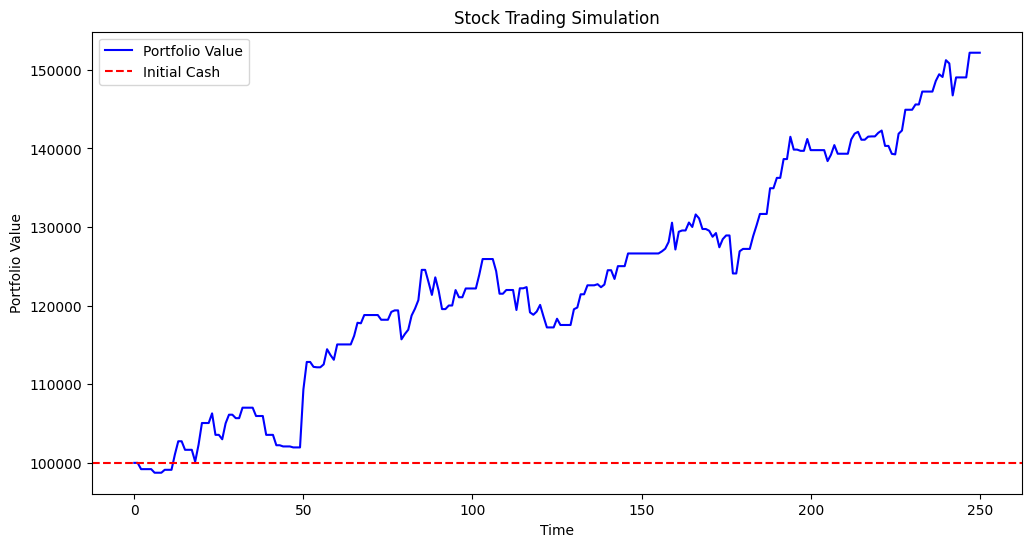

In [88]:
import matplotlib.pyplot as plt

initial_cash = 100000  # Set your initial cash amount
cash = initial_cash
stocks_held = 0   # Number of stocks
portfolio_value = []

for index, row in X2_test.iterrows():
    newRow = row.drop('Close').copy()
    prediction = model.predict([newRow])[0]

    if prediction == 1:  # Buy signal
        while cash > row['Close']:
            stocks_held += 1
            cash -= row['Close']
    elif prediction == -1:  # Sell signal
        while stocks_held > 0:
            cash += row['Close']
            stocks_held -= 1

    portfolio_value.append(cash + stocks_held * row['Close'])

# Include the last portfolio value after the last data point
portfolio_value.append(cash + stocks_held * X2_test.iloc[-1]['Close'])

final_portfolio_value = portfolio_value[-1]  # Use the last value in the list
gain_or_loss = final_portfolio_value - initial_cash

print(f"Initial Portfolio Value: {initial_cash}")
print(f"Final Portfolio Value: {final_portfolio_value}")
print(f"Gain or Loss: {gain_or_loss}")

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(portfolio_value, label='Portfolio Value', color='blue')
plt.axhline(y=initial_cash, color='r', linestyle='--', label='Initial Cash')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.title('Stock Trading Simulation')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not 

Initial Portfolio Value: 100000
Final Portfolio Value: 118761.4098052978
Gain or Loss: 18761.409805297793


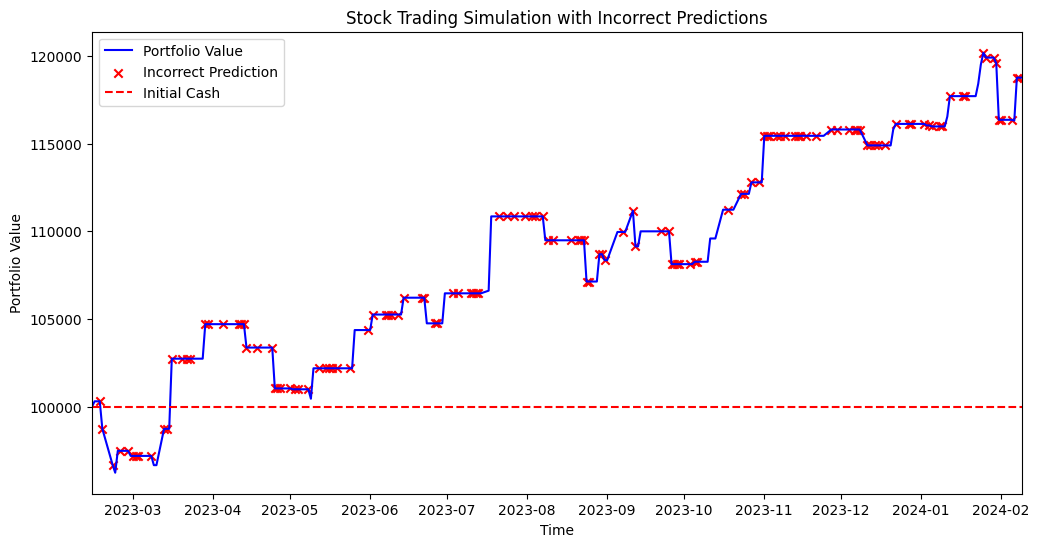

In [ ]:
import matplotlib.pyplot as plt

initial_cash = 100000  # Set your initial cash amount
cash = initial_cash
stocks_held = 0   # Number of stocks
portfolio_value = []
incorrect_predictions = []

for index, row in X2_test.iterrows():
    newRow = row.drop('Close').copy()
    prediction = model.predict([newRow])[0]

    if prediction == 1:  # Buy signal
        while cash > row['Close']:
            stocks_held += 1
            cash -= row['Close']
    elif prediction == -1:  # Sell signal
        while stocks_held > 0:
            cash += row['Close']
            stocks_held -= 1

    portfolio_value.append(cash + stocks_held * row['Close'])

    # Check if the prediction was incorrect
    actual_movement = int(y_test.loc[index])
    if prediction != actual_movement:
        incorrect_predictions.append((index, portfolio_value[-1]))

# Include the last portfolio value after the last data point
portfolio_value.append(cash + stocks_held * X2_test.iloc[-1]['Close'])

final_portfolio_value = portfolio_value[-1]  # Use the last value in the list
gain_or_loss = final_portfolio_value - initial_cash

print(f"Initial Portfolio Value: {initial_cash}")
print(f"Final Portfolio Value: {final_portfolio_value}")
print(f"Gain or Loss: {gain_or_loss}")

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(X2_test.index, portfolio_value[:-1], label='Portfolio Value', color='blue')  # Exclude the last value for better visualization
incorrect_indices, incorrect_values = zip(*incorrect_predictions)
plt.scatter(incorrect_indices, incorrect_values, color='red', marker='x', label='Incorrect Prediction')

plt.axhline(y=initial_cash, color='r', linestyle='--', label='Initial Cash')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.title('Stock Trading Simulation with Incorrect Predictions')
plt.legend()
plt.xlim(X2_test.index[0], X2_test.index[-1])  # Set the x-axis limits to the desired date range
plt.show()

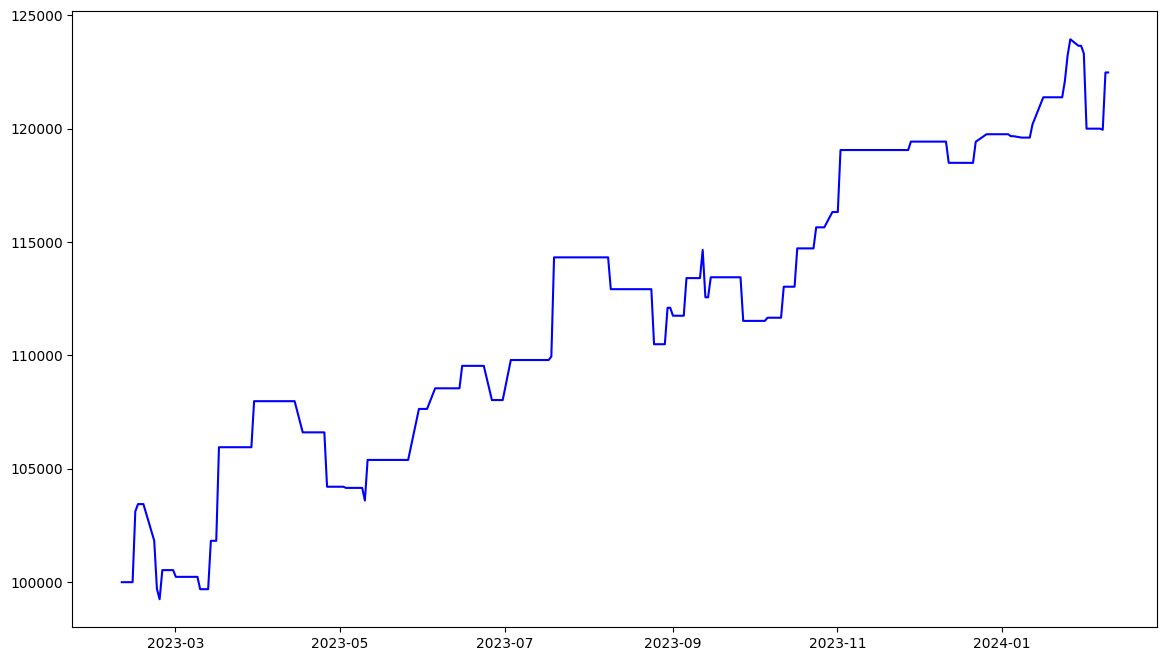

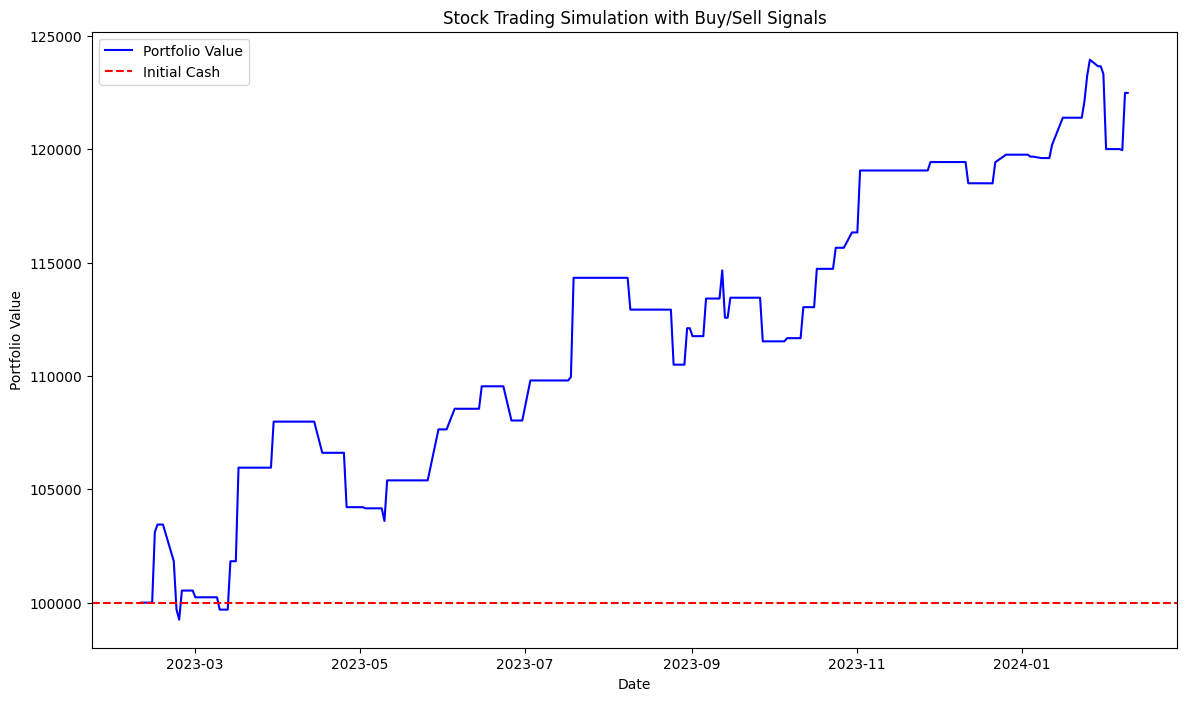

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'model' is your trained KNN model
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

# Concatenate the training and testing predictions for the entire dataset
all_predictions = np.concatenate([predictions_train, predictions_test])

# Create a new DataFrame with the predicted signals
signals_df = pd.DataFrame(index=data.index)
signals_df['Buy_Sell_Signal'] = all_predictions

# Filter signals for the last year
last_year_signals = signals_df[signals_df.index >= signals_df.index[-1] - pd.DateOffset(years=1)]

# Filter stock data for the last year
last_year_data = data[data.index >= data.index[-1] - pd.DateOffset(years=1)]

# Initialize portfolio variables
initial_cash = 100000  # Set your initial cash amount
cash = initial_cash
stocks_held = 0   # Number of stocks
portfolio_value = [initial_cash]  # Include the initial cash in the portfolio value
transaction_history = []  # To store buy/sell transactions

# Trading simulation loop
for index, row in last_year_data.iterrows():
    prediction = signals_df.loc[index, 'Buy_Sell_Signal']

    if prediction == 1 and cash > row['Close']:  # Buy signal
        stocks_bought = cash // row['Close']  # Buy as many stocks as possible with available cash
        stocks_held += stocks_bought
        cash -= stocks_bought * row['Close']
        transaction_history.append((index, 'Buy', row['Close'], stocks_bought))
    elif prediction == -1 and stocks_held > 0:  # Sell signal
        cash += stocks_held * row['Close']
        transaction_history.append((index, 'Sell', row['Close'], stocks_held))
        stocks_held = 0

    # Update portfolio value after each transaction
    portfolio_value.append(cash + stocks_held * row['Close'])

# Plotting the portfolio value over time
plt.figure(figsize=(14, 8))
plt.plot(last_year_data.index, portfolio_value[:-1], label='Portfolio Value', color='blue')
# Plotting the portfolio value over time
plt.figure(figsize=(14, 8))
plt.plot(last_year_data.index, portfolio_value[:-1], label='Portfolio Value', color='blue')

# Extract buy and sell signals for plotting
buy_signals = [(index, value) for index, _, _, value in transaction_history if _ == 'Buy']
sell_signals = [(index, value) for index, _, _, value in transaction_history if _ == 'Sell']

# Plot Buy signals
if buy_signals:
    buy_indices, buy_values = zip(*buy_signals)
    plt.scatter(buy_indices, buy_values, color='green', marker='^', label='Buy Signal')

# Plot Sell signals
if sell_signals:
    sell_indices, sell_values = zip(*sell_signals)
    plt.scatter(sell_indices, sell_values, color='red', marker='v', label='Sell Signal')

plt.axhline(y=initial_cash, color='r', linestyle='--', label='Initial Cash')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Stock Trading Simulation with Buy/Sell Signals')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X

Initial Portfolio Value: 100000
Final Portfolio Value: 141076.215927124
Gain or Loss: 41076.215927123994


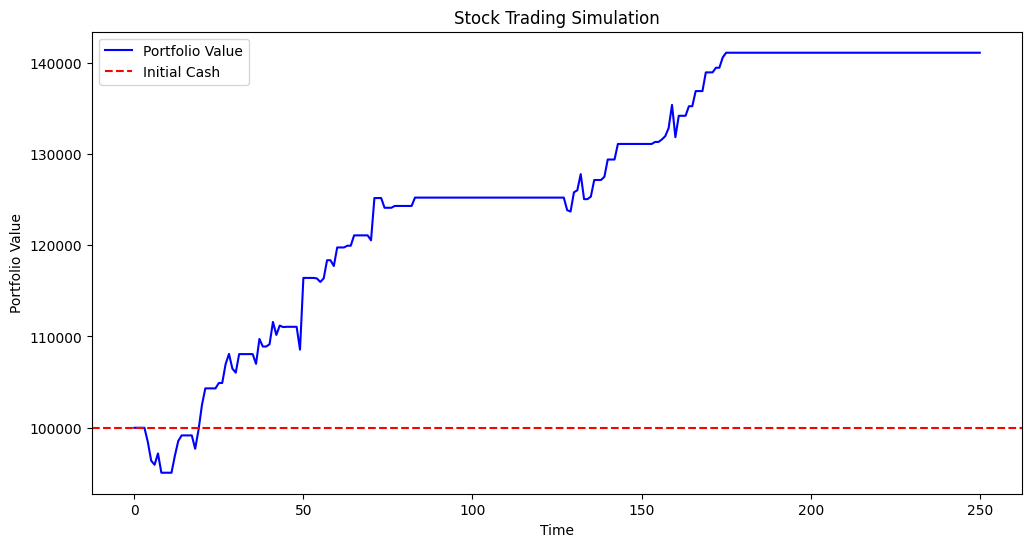

In [125]:
import matplotlib.pyplot as plt

initial_cash = 100000  # Set your initial cash amount
cash = initial_cash
stocks_held = 0   # Number of stocks
portfolio_value = []

for index, row in X2_test.iterrows():
    newRow = row.drop('Close').copy()
    prediction = model3.predict([newRow])[0]

    if prediction == 1:  # Buy signal
        while cash > row['Close']:
            stocks_held += 1
            cash -= row['Close']
    elif prediction == -1:  # Sell signal
        while stocks_held > 0:
            cash += row['Close']
            stocks_held -= 1

    portfolio_value.append(cash + stocks_held * row['Close'])

# Include the last portfolio value after the last data point
portfolio_value.append(cash + stocks_held * X2_test.iloc[-1]['Close'])

final_portfolio_value = portfolio_value[-1]  # Use the last value in the list
gain_or_loss = final_portfolio_value - initial_cash

print(f"Initial Portfolio Value: {initial_cash}")
print(f"Final Portfolio Value: {final_portfolio_value}")
print(f"Gain or Loss: {gain_or_loss}")

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(portfolio_value, label='Portfolio Value', color='blue')
plt.axhline(y=initial_cash, color='r', linestyle='--', label='Initial Cash')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.title('Stock Trading Simulation')
plt.legend()
plt.show()
